<a href="https://colab.research.google.com/github/shewv2/Machine-Learning-Project-/blob/main/Fake_Job_posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **LOAD AND EXPLORE THE DATA**

In [ ]:
df = pd.read_csv('/content/fake_job.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# **DATA PREPROCESSING - Handle Missing Values**

In [ ]:
df.isna().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
missing_columns  = df.columns[df.isna().sum()>0]
for col in missing_columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df["location"].mode()[0]

'GB, LND, London'

In [ ]:
df.isna().sum()

,0
job_id,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
job_id,int64
title,int64
location,int64
department,int64
salary_range,int64
company_profile,int64
description,int64
requirements,int64
benefits,int64
telecommuting,int64


 # Analysis of Job posting using box plot and Bar Plot

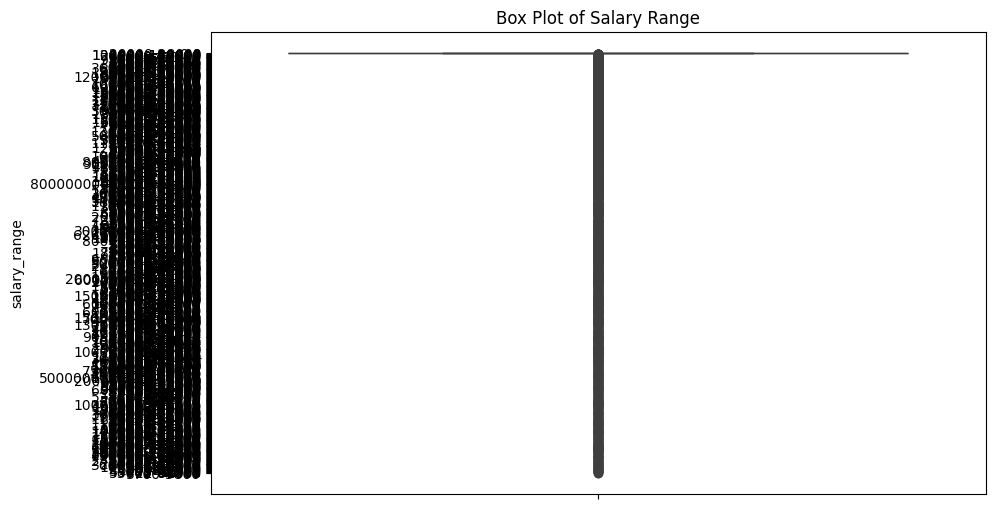

In [ ]:
# Create a box plot on salary range
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(y='salary_range', data=df)
plt.title('Box Plot of Salary Range')
plt.show()

<ipython-input-14-7ef2a181d5dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='employment_type', data=df, palette='magma')


Text(0, 0.5, 'Number of Postings')

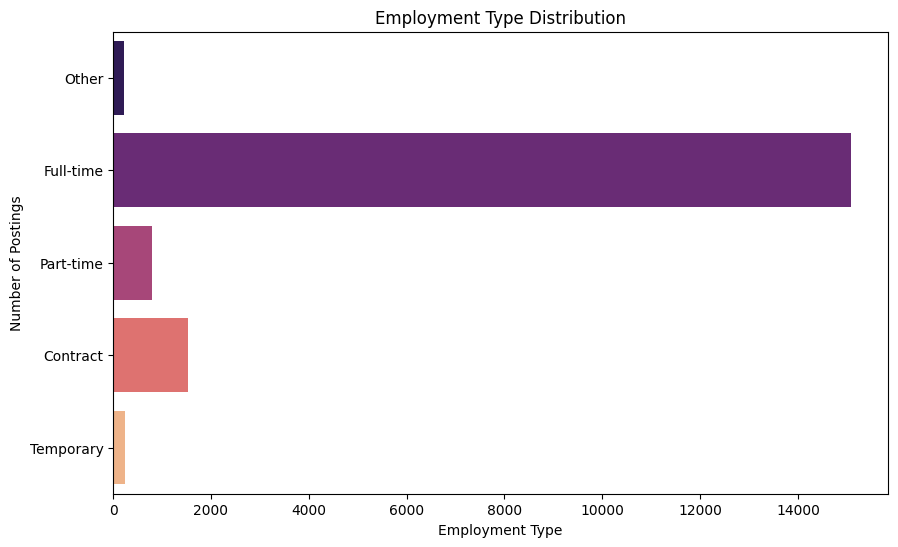

In [ ]:
# Create a Bar plot on Employement Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='employment_type', data=df, palette='magma')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Number of Postings')

<ipython-input-15-fe0d9f30025b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='required_experience', data=df, palette='magma')


Text(0, 0.5, 'Number of Postings')

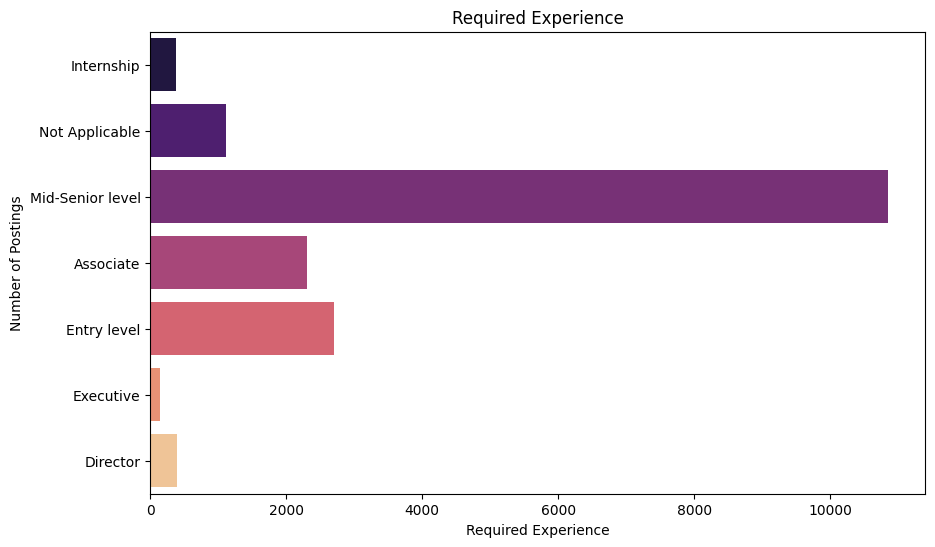

In [ ]:
# Create a Bar plot on Required Experience
plt.figure(figsize=(10, 6))
sns.countplot(y='required_experience', data=df, palette='magma')
plt.title('Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Number of Postings')

<ipython-input-16-9ec8d54f7018>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='required_education', data=df, palette='magma')


Text(0, 0.5, 'Number of Postings')

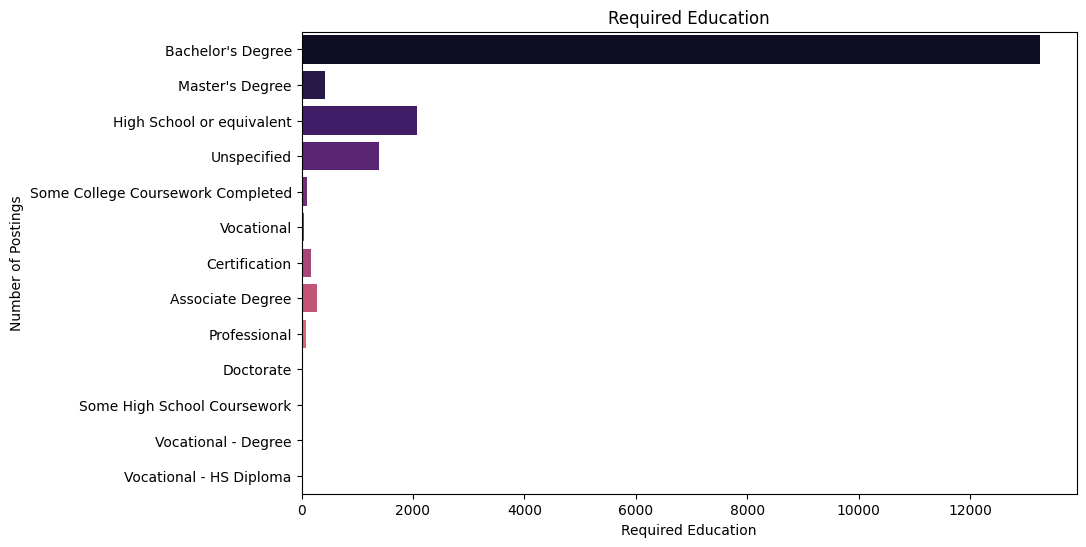

In [ ]:
# Create a Bar plot on Required Education
plt.figure(figsize=(10, 6))
sns.countplot(y='required_education', data=df, palette='magma')
plt.title('Required Education')
plt.xlabel('Required Education')
plt.ylabel('Number of Postings')

<ipython-input-17-fce32dc0d066>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='function', data=df, palette='magma')


Text(0, 0.5, 'Number of Postings')

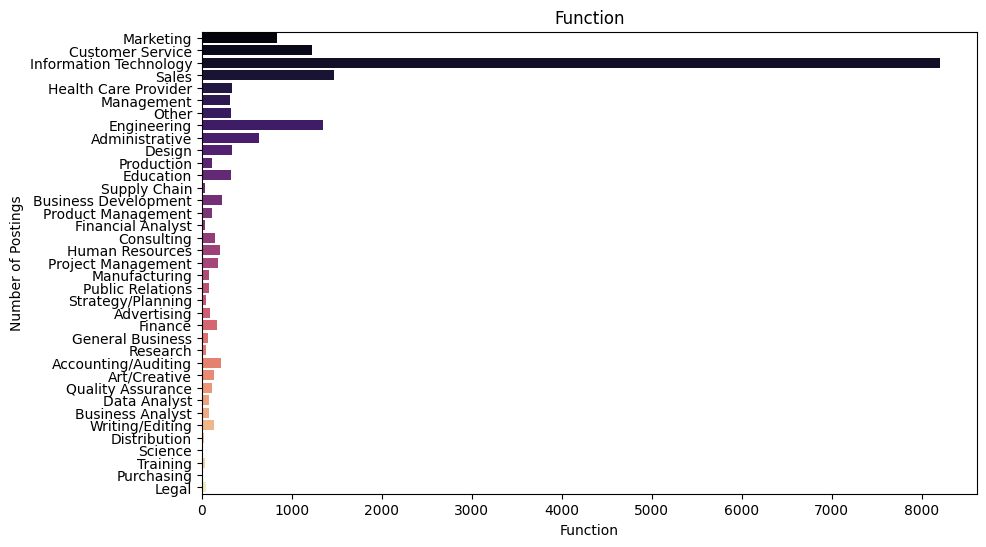

In [ ]:
# Create a Bar plot on Function
plt.figure(figsize=(10, 6))
sns.countplot(y='function', data=df, palette='magma')
plt.title('Function')
plt.xlabel('Function')
plt.ylabel('Number of Postings')

<ipython-input-18-68d91951a4da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='cividis')


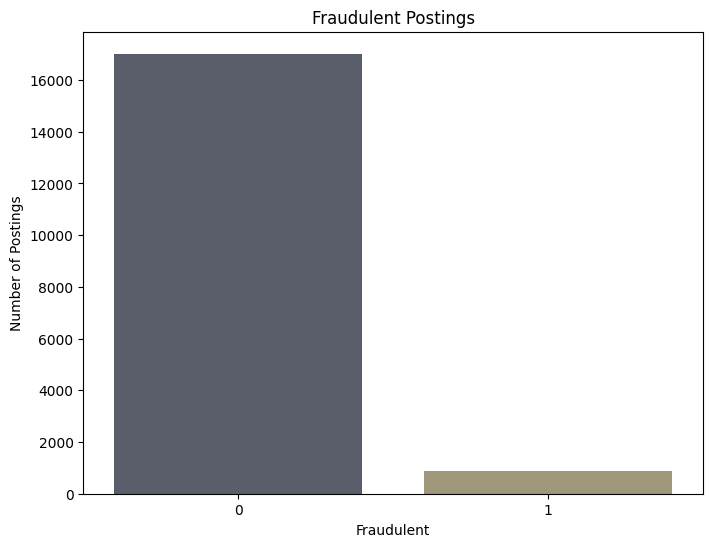

In [ ]:
# 5. Fraudulent Postings
fraudulent_counts = df['fraudulent'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='cividis')
plt.title('Fraudulent Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Number of Postings')
plt.show()

# Encode categorical variables

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#Split the data

In [ ]:
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL SELCTION

In [ ]:
evaluation, models = [], []
accuracy_scores = []
classification_reports = []
confusion_matrices = []
model_predictions = []

# RANDOM FOREST

In [ ]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))


Accuracy: 0.9867636092468307
Confusion Matrix:
 [[5093    0]
 [  71  200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       1.00      0.74      0.85       271

    accuracy                           0.99      5364
   macro avg       0.99      0.87      0.92      5364
weighted avg       0.99      0.99      0.99      5364



In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
model.predict_proba(xtrain)

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516



# kNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       1.00      0.74      0.85       271

    accuracy                           0.99      5364
   macro avg       0.99      0.87      0.92      5364
weighted avg       0.99      0.99      0.99      5364



# Navive Bayes

#Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11921
           1       0.32      0.21      0.26       595

    accuracy                           0.94     12516
   macro avg       0.64      0.60      0.61     12516
weighted avg       0.93      0.94      0.94     12516



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5093
           1       0.35      0.21      0.26       271

    accuracy                           0.94      5364
   macro avg       0.65      0.60      0.62      5364
weighted avg       0.93      0.94      0.93      5364



# Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11921
           1       0.32      0.21      0.26       595

    accuracy                           0.94     12516
   macro avg       0.64      0.60      0.61     12516
weighted avg       0.93      0.94      0.94     12516



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5093
           1       0.35      0.21      0.26       271

    accuracy                           0.94      5364
   macro avg       0.65      0.60      0.62      5364
weighted avg       0.93      0.94      0.93      5364



# Bernoulli NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     11921
           1       0.38      0.04      0.07       595

    accuracy                           0.95     12516
   macro avg       0.67      0.52      0.52     12516
weighted avg       0.93      0.95      0.93     12516



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       0.55      0.10      0.17       271

    accuracy                           0.95      5364
   macro avg       0.75      0.55      0.57      5364
weighted avg       0.93      0.95      0.93      5364



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
model.fit(xtrain, ytrain)

SVC()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     11921
           1       0.00      0.00      0.00       595

    accuracy                           0.95     12516
   macro avg       0.48      0.50      0.49     12516
weighted avg       0.91      0.95      0.93     12516



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       0.00      0.00      0.00       271

    accuracy                           0.95      5364
   macro avg       0.47      0.50      0.49      5364
weighted avg       0.90      0.95      0.92      5364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 # Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     11921
           1       0.17      0.00      0.00       595

    accuracy                           0.95     12516
   macro avg       0.56      0.50      0.49     12516
weighted avg       0.92      0.95      0.93     12516



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       1.00      0.01      0.03       271

    accuracy                           0.95      5364
   macro avg       0.98      0.51      0.50      5364
weighted avg       0.95      0.95      0.93      5364



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       1.00      0.01      0.03       271

    accuracy                           0.95      5364
   macro avg       0.98      0.51      0.50      5364
weighted avg       0.95      0.95      0.93      5364



# boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators = 100)
model.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=100)

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11921
           1       0.92      0.60      0.73       595

    accuracy                           0.98     12516
   macro avg       0.95      0.80      0.86     12516
weighted avg       0.98      0.98      0.98     12516



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.93      0.64      0.76       271

    accuracy                           0.98      5364
   macro avg       0.96      0.82      0.87      5364
weighted avg       0.98      0.98      0.98      5364



In [ ]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.93      0.64      0.76       271

    accuracy                           0.98      5364
   macro avg       0.96      0.82      0.87      5364
weighted avg       0.98      0.98      0.98      5364



# MODEL TRAINING

In [ ]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

# MODEL EVALUATION

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))


Accuracy: 0.9867636092468307
Confusion Matrix:
 [[5093    0]
 [  71  200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       1.00      0.74      0.85       271

    accuracy                           0.99      5364
   macro avg       0.99      0.87      0.92      5364
weighted avg       0.99      0.99      0.99      5364



In [ ]:
model.predict_proba(xtrain)

array([[1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

